In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
dtrain=pd.read_csv(r"E:\Flip robo Internship\Assignments\projects\Projext_1\train.csv")

In [3]:
dtrain.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
dtest=pd.read_csv(r"E:\Flip robo Internship\Assignments\projects\Projext_1\test.csv")

In [5]:
dtest.head()

,User_ID,Description,Browser_Used,Device_Used
0,id80132,Looking for a motel in close proximity to TV t...,Firefox,Mobile
1,id80133,Walking distance to Madison Square Garden and ...,InternetExplorer,Desktop
2,id80134,Visited Seattle on business. Spent - nights in...,IE,Tablet
3,id80135,This hotel location is excellent and the rooms...,Edge,Mobile
4,id80136,This hotel is awesome I love the service Antho...,Mozilla,Mobile


In [6]:
dtrain.shape

(38932, 5)

In [7]:
dtest.shape

(29404, 4)

In [8]:
dtrain.Is_Response.unique()

array(['not happy', 'happy'], dtype=object)

In [9]:
dtrain.Is_Response.value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [10]:
dtrain.Description[8]

"My boyfriend and I stayed at the Fairmont on a recent trip to San Francisco. I could not recommend this hotel more. \nI called the hotel a few weeks before to order a cake to be delivered to our room on our first night to celebrate my boyfriend's birthday. I was immediately connected directly to the pastry chef who helped me to design the most delicious cake I have ever eaten in my entire life! \nThe rooms are large and luxurious with a wonderful old-world feel. \n Most importantly don't miss a dinner at the Tonga Room! What a fun restaurant. Definitely order a Scorpion Bowl, but only if you’re staying in the hotel -- they're strong!!"

In [11]:
from nltk.stem.snowball import SnowballStemmer 
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize

In [12]:
class PreProcessor:
    def __init__(self, df, column_name):
        self.data = df
        self.conversations = list(self.data[column_name])
        self.stopwords = set(stopwords.words('english'))
        self.stemmer = SnowballStemmer("english")
        self.preprocessed = []
        
    def tokenize(self, sentence):
        tokenized_sentence = word_tokenize(sentence)
        return tokenized_sentence
            
    def remove_stopwords(self, sentence):
        filtered_sentence = []
        for w in sentence:
            if w not in self.stopwords and len(w) > 1 and w[:2] != '//' and w != 'https': 
                filtered_sentence.append(w)
        return filtered_sentence
    
    def stem(self, sentence):
        '''
        Stems certain words to their root form.
        For example, words like 'computer', 'computation'
        all get truncated to 'comput'
        '''
        return [self.stemmer.stem(word) for word in sentence]
    
    def join_to_string(self, sentence):
        '''
        Joins the tokenized words to one string.
        '''
        return ' '.join(sentence)
    
    def full_preprocess(self, n_rows=None):
        # If nothing is given do it for the whole dataset
        if n_rows == None:
            n_rows = len(self.data)
            
        # Perform preprocessing
        for i in range(n_rows):
            tweet = self.conversations[i]
            tokenized = self.tokenize(tweet)
            cleaned = self.remove_stopwords(tokenized)
            stemmed = self.stem(cleaned)
            joined = self.join_to_string(stemmed)
            self.preprocessed.append(joined)
        return self.preprocessed

In [13]:
# Preprocess text and put it in a new column
preprocessor = PreProcessor(df_train, 'Description')
df_train['cleaned_text'] = preprocessor.full_preprocess()

In [14]:
dtrain.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,cleaned_text
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,the room kind clean veri strong smell dog gene...
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,stay crown plaza april -- april -- -- -- the s...
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,book hotel hotwir lowest price could find when...
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stay husband son way alaska cruis we love hote...
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,my girlfriend stay celebr -- th birthday we pl...


In [15]:
dtrain.drop(['Description'],axis=1,inplace=True)
dtrain.head()

,User_ID,Browser_Used,Device_Used,Is_Response,cleaned_text
0,id10326,Edge,Mobile,not happy,the room kind clean veri strong smell dog gene...
1,id10327,Internet Explorer,Mobile,not happy,stay crown plaza april -- april -- -- -- the s...
2,id10328,Mozilla,Tablet,not happy,book hotel hotwir lowest price could find when...
3,id10329,InternetExplorer,Desktop,happy,stay husband son way alaska cruis we love hote...
4,id10330,Edge,Tablet,not happy,my girlfriend stay celebr -- th birthday we pl...


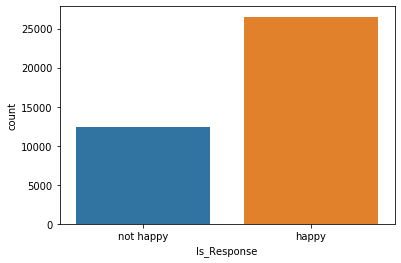

In [16]:
sns.countplot(x='Is_Response',data=dtrain)

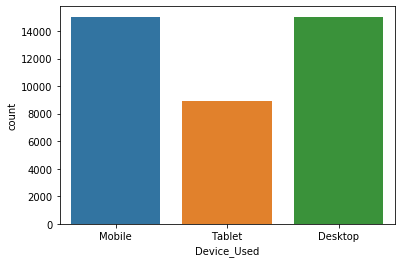

In [17]:
sns.countplot(x='Device_Used',data=dtrain)

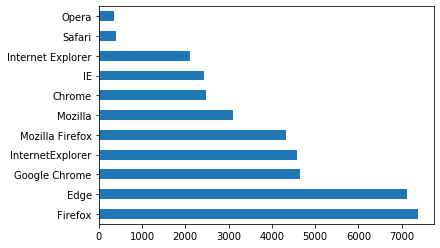

In [18]:
dtrain['Browser_Used'].value_counts().head(30).plot(kind='barh')

In [19]:
from sklearn.utils import shuffle
import tensorflow
dtrain = shuffle(df_train, random_state=tensorflow.random.set_seed(1234))
# Keeping 1000 samples of the data as test set
test_set = dtrain[:1000]

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_train['cleaned_text'][1000:], 
                                                  df_train['Is_Response'][1000:], 
                                                  test_size=0.2, 
                                                  random_state=tensorflow.random.set_seed(1234))

y_test = test_set['Is_Response']

In [21]:
 X_train.shape

(30345,)

In [22]:
X_val.shape

(7587,)

In [23]:
y_train.shape

(30345,)

In [24]:
y_val.shape

(7587,)

In [25]:
y_test.shape

(1000,)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(test_set['cleaned_text'])

In [27]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
from sklearn.metrics  import accuracy_score
# Checking results
train_pred = multi_nb.predict(X_train)
val_pred = multi_nb.predict(X_val)
print(f'Accuracy on training set (MultinomialNB): {round(accuracy_score(y_train, train_pred)*100, 4)}%')
print(f'Accuracy on validation set (MultinomialNB): {round(accuracy_score(y_val,val_pred)*100, 4)}%')

Accuracy on training set (MultinomialNB): 83.2691%
Accuracy on validation set (MultinomialNB): 81.4815%


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=200, 
                                 max_depth=6, 
                                 random_state=tensorflow.random.set_seed(1234))
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=6,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [30]:
train_pred = gbm.predict(X_train)
val_pred = gbm.predict(X_val)
print(f'Accuracy on training set (GBM): {round(accuracy_score(y_train, train_pred)*100, 4)}%')
print(f'Accuracy on validation set (GBM): {round(accuracy_score(y_val,val_pred)*100, 4)}%')

Accuracy on training set (GBM): 93.6925%
Accuracy on validation set (GBM): 86.0946%


In [31]:
import xgboost as xgb
xgb_params = {'objective' : 'multi:softmax',
              'eval_metric' : 'mlogloss',
              'eta' : 0.1,
              'max_depth' : 6,
              'num_class' : 3,
              'lambda' : 0.8,
              'estimators' : 200,
              'seed' : 1234
              
}

# Transform categories into numbers
# negative = 0, neutral = 1 and positive = 2
target_train = y_train.astype('category').cat.codes
target_val = y_val.astype('category').cat.codes

# Transform data into a matrix so that we can use XGBoost
d_train = xgb.DMatrix(X_train, label = target_train)
d_val = xgb.DMatrix(X_val, label = target_val)

# Fit XGBoost
watchlist = [(d_train, 'train'), (d_val, 'validation')]
bst = xgb.train(xgb_params, 
                d_train, 
                400,  
                watchlist,
                early_stopping_rounds = 50, 
                verbose_eval = 0)

In [32]:
train_pred = bst.predict(d_train)
val_pred = bst.predict(d_val)
print(f'Accuracy on training set (XGBoost): {round(accuracy_score(target_train, train_pred)*100, 4)}%')
print(f'Accuracy on validation set (XGBoost): {round(accuracy_score(target_val, val_pred)*100, 4)}%')

Accuracy on training set (XGBoost): 96.3552%
Accuracy on validation set (XGBoost): 87.07%


In [33]:
import pickle 
pickle.dump(bst, open('xgboost_sentiment_model.dat', 'wb'))

In [34]:
test_set.head()

,User_ID,Browser_Used,Device_Used,Is_Response,cleaned_text
18322,id28648,Chrome,Tablet,not happy,we stay two night hilton point short getaway t...
4559,id14885,InternetExplorer,Desktop,happy,veri nice hotel great locat the staff welcom f...
14636,id24962,IE,Desktop,happy,stay march -- -- night paid -- -- night hotwir...
7313,id17639,Edge,Desktop,not happy,this un-child friend hotel ve ever stay n't ex...
16328,id26654,Mozilla Firefox,Mobile,happy,stay one night hotel arriv us help jetlag two ...


In [35]:
target_test = y_test.astype('category').cat.codes
d_test = xgb.DMatrix(X_test, label = target_test)
xgboost_test_pred = bst.predict(d_test)

In [36]:
pred_df = pd.DataFrame({'id': test_set['User_ID'],
                        'text' : test_set['cleaned_text'],
                       'xgboost_pred' : xgboost_test_pred.astype(int),
                       })

In [37]:
pred_df['xgboost_pred'] = pred_df['xgboost_pred'].map({0: 'Negative', 1 : 'Positive'})

# xgboost test prediction

In [39]:
pred_df

,id,text,xgboost_pred
18322,id28648,we stay two night hilton point short getaway t...,Positive
4559,id14885,veri nice hotel great locat the staff welcom f...,Negative
14636,id24962,stay march -- -- night paid -- -- night hotwir...,Negative
7313,id17639,this un-child friend hotel ve ever stay n't ex...,Positive
16328,id26654,stay one night hotel arriv us help jetlag two ...,Negative
11889,id22215,my friend found stay dread room thermostat wor...,Positive
35892,id46218,barton creek great getaway everyth room restau...,Negative
6549,id16875,arriv memphi day earli ... look websit good pr...,Negative
27124,id37450,as soon walk werr great smile face welcom comv...,Negative
38324,id48650,we flew la london arriv late one whole day la ...,Negative
